## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder

### Load the dataset

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df=tips

### 1. Make a list of categorical and numerical columns in the data.

In [6]:
df_series=df.dtypes

In [7]:
df_series

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [8]:
df_numerical_col=df.select_dtypes(include=['int64','float64'])
df_numerical_col.columns.tolist()

['total_bill', 'tip', 'size']

In [9]:
df_categorical_col=df.select_dtypes(include='category')
df_categorical_col.columns.tolist()

['sex', 'smoker', 'day', 'time']

### 2. Compute the average bill amount for each day.

In [10]:
df.groupby("day")['total_bill'].mean().reset_index()

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


### 3. Which gender is more generous in giving tips?

In [11]:
df.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

Male gender are more generous with mean of 3.08.

### 4. According to the data, were there more customers for dinner or lunch?

In [12]:
df.groupby('time')['size'].sum()

time
Lunch     164
Dinner    463
Name: size, dtype: int64

Dinner has more customers than lunch. 

### 5. Based on the statistical summary, comment on the variable 'tip'

In [13]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Variable tip , has max tip of 10.00, min tip of 1.00, all customers gave tip.

### 6. Find the busiest day in terms of the orders?

In [14]:
df.groupby("day").size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

Saturday is the busiest day for orders.

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [15]:
df["total_bill"].skew()

1.1332130376158205

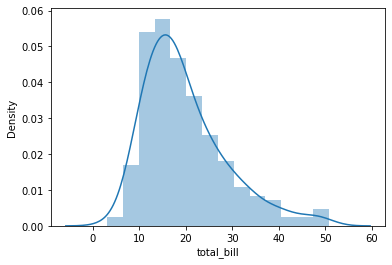

In [16]:
sns.distplot(df["total_bill"])
plt.show()

Yes,the variable total_bill is positively skewed.

8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

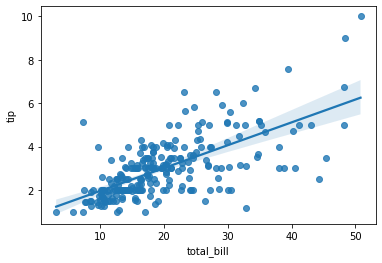

In [17]:
sns.regplot(y='tip',x='total_bill',data=df)
plt.show()

Yes tip amount depends on the total bill, it increases accordingly.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

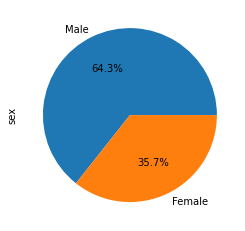

In [18]:
tips["sex"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Female Percentage is 35.7 & Male Percentage is 64.3

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [19]:
df.groupby('sex')['smoker'].value_counts()

sex        
Male    No     97
        Yes    60
Female  No     54
        Yes    33
Name: smoker, dtype: int64

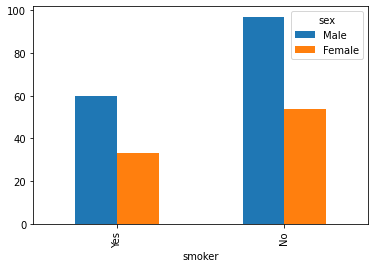

In [20]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [21]:
average_tip=df.groupby("day")['tip'].mean().reset_index()
average_tip

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


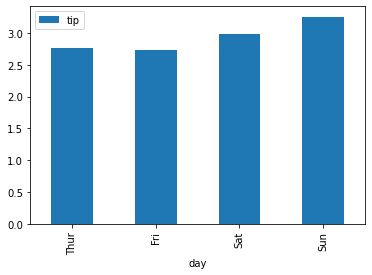

In [22]:
average_tip.plot(kind='bar',x='day')
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [23]:
avg=df.groupby('size')['total_bill'].mean().reset_index()
avg

,size,total_bill
0,1,7.242500
1,2,16.448013
2,3,23.277632
3,4,28.613514
4,5,30.068000
5,6,34.830000


<AxesSubplot:xlabel='size', ylabel='total_bill'>

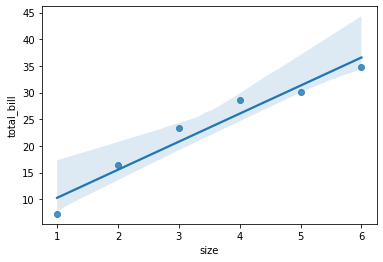

In [24]:
sns.regplot(y=avg['total_bill'],x=avg['size'])

Plot shows that the average bill amount dependent on the size of the group.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

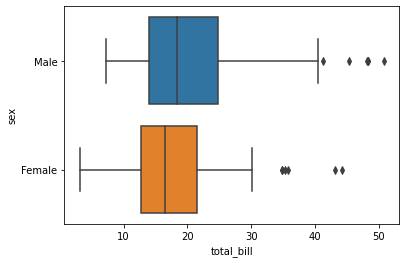

In [25]:
sns.boxplot(x='total_bill',y='sex',data=df,orient='h') 

Bill amount shows that male have more total bills.

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [26]:
x=df.groupby('day')['total_bill'].max()

In [27]:
x.loc[["Sun","Sat"]]

day
Sun    48.17
Sat    50.81
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [28]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There is no null values hence the percentage will be zero.

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [29]:
len(df[df.duplicated()])

1

There is only one duplicated value.

In [30]:
df.drop_duplicates(inplace=True)

Dropped the duplicated value

In [31]:
len(df[df.duplicated()])

0

Length function shows zero duplicate.

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

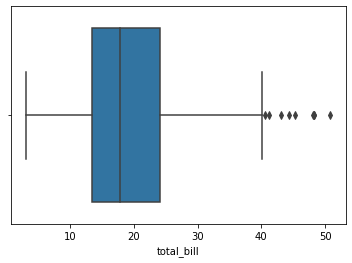

In [32]:
sns.boxplot(df['total_bill'])
plt.show()

Yes,outliers present, we need to treat them using transformation aooroach, which resulted in the a new plot below.

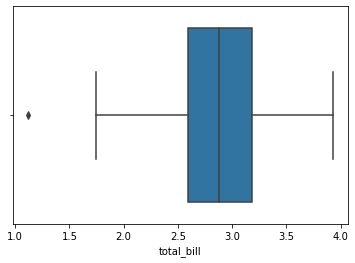

In [33]:
bill_log = np.log(df['total_bill'])
sns.boxplot(bill_log)
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

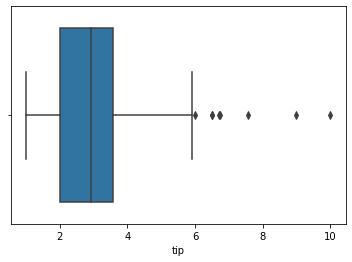

In [34]:
sns.boxplot(df['tip'])
plt.show()

Yes, outliers are present in the column tip.Below steps showing removing them using IQR techinque.

In [35]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

2.0
3.575
1.5750000000000002


In [36]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

-0.36250000000000027
5.9375


In [38]:
df = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

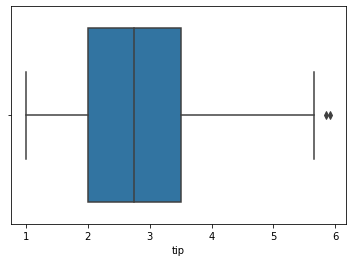

In [39]:
sns.boxplot(df['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [40]:
tips=pd.get_dummies(tips,drop_first=True)
tips.sample(5)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
137,14.15,2.00,2,1,1,0,0,0,0
38,18.69,2.31,3,0,1,0,1,0,1
89,21.16,3.00,2,0,1,0,0,0,0
84,15.98,2.03,2,0,1,0,0,0,0
77,27.20,4.00,4,0,1,0,0,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [41]:
tip_max=df['total_bill'].max()
tip_min=df['total_bill'].min()
range= tip_max-tip_min
print(range)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
tips['total_bill_mm']=mm.fit_transform(tips[['total_bill']])
tip_mm_max=tips['total_bill_mm'].max()
tip_mm_min=tips['total_bill_mm'].min()
range=tip_mm_max-tip_mm_min
print(range)

45.1
0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [42]:
tips_df=tips.copy()
tips_df

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill_mm
0,16.99,1.01,2,1,1,0,0,1,1,0.291579
1,10.34,1.66,3,0,1,0,0,1,1,0.152283
2,21.01,3.50,3,0,1,0,0,1,1,0.375786
3,23.68,3.31,2,0,1,0,0,1,1,0.431713
4,24.59,3.61,4,1,1,0,0,1,1,0.450775
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1,0.543779
240,27.18,2.00,2,1,0,0,1,0,1,0.505027
241,22.67,2.00,2,0,0,0,1,0,1,0.410557
242,17.82,1.75,2,0,1,0,1,0,1,0.308965


In [43]:
tips_df=pd.get_dummies(tips_df,drop_first=True)
tips_df

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill_mm
0,16.99,1.01,2,1,1,0,0,1,1,0.291579
1,10.34,1.66,3,0,1,0,0,1,1,0.152283
2,21.01,3.50,3,0,1,0,0,1,1,0.375786
3,23.68,3.31,2,0,1,0,0,1,1,0.431713
4,24.59,3.61,4,1,1,0,0,1,1,0.450775
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1,0.543779
240,27.18,2.00,2,1,0,0,1,0,1,0.505027
241,22.67,2.00,2,0,0,0,1,0,1,0.410557
242,17.82,1.75,2,0,1,0,1,0,1,0.308965


In [44]:
x=tips_df.drop(['tip'],axis=1)

In [45]:
y=tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=1)

#create an object
min_max = MinMaxScaler()

tips_scaled1 = tips_df.copy()
tips_scaled1.iloc[:,[0,2]] = min_max.fit_transform(tips_scaled1.iloc[:,[0,2]])
tips_scaled1.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,total_bill_mm
0,0.291579,1.01,0.2,1,1,0,0,1,1,0.291579
1,0.152283,1.66,0.4,0,1,0,0,1,1,0.152283
2,0.375786,3.50,0.4,0,1,0,0,1,1,0.375786
3,0.431713,3.31,0.2,0,1,0,0,1,1,0.431713
4,0.450775,3.61,0.6,1,1,0,0,1,1,0.450775


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [47]:
from sklearn.linear_model import LinearRegression
x_train, x_test,y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)
y_pred=regression_model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3813645896587351

### Happy Learning:)